<a href="https://colab.research.google.com/github/amgurkas/adv-programming/blob/main/week7/NYC_Motor_Vehicle_Collisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity: NYC Motor Vehicle Collisions - City Safety Analyst Report

**Overview**

In this one-hour live meetup, you’ll work in small groups (2-3 students) as City Safety Analysts for the NYC Department of Transportation. Your team has been assigned a borough to analyze data from the NYC Motor Vehicle Collisions Dataset, which tracks vehicle crashes across the city. Your task is to investigate crash patterns, identify safety risks, and propose data-driven recommendations to reduce accidents. Each group will present a concise "Safety Report" to the "DOT leadership" (the class), simulating a workplace briefing.

---



**Dataset Description**

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data

Check out this link for info on columns


---



# Workplace Scenario: City Safety Analysts

**Role**: You’re a team of analysts tasked with improving road safety in your assigned borough.

**Objective**: Use data to pinpoint a key safety issue and recommend a actionable solution (e.g., "Install speed bumps on high-speed crash zones").

**Presentation**: Deliver a concise "Safety Report" as if briefing DOT leadership, including:

* A key finding (e.g., "40% of crashes are due to driver distraction").
* A visualization (e.g., bar chart).
* A recommendation (e.g., "Increase distracted driving awareness campaigns").



---



**Analysis** (35 minutes): Groups analyze their borough’s data, focusing on:

* Common causes of crashes.
* Patterns in time or severity.
* High-risk factors or areas.

**Prepare Presentation** (10 minutes): Create a "Safety Report" with a visualization and a practical recommendation (e.g., new traffic signal, speed cameras).

**Present** (15 minutes): Each group presents their report (2-3 minutes) as if briefing DOT leadership, followed by a quick class discussion.


---




# Guided Open-Ended Questions

**Each group should answer 1-2 of these questions for their borough:**

What are the most common causes of crashes in your borough?

* Example: Bar chart of top contributing factors.

* Follow-Up: Are any causes unexpectedly frequent?

* Do any causes suprise you? What real-world situations might explain these patterns?

* tips: pandas value_count() function, seaborn barplot

https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
https://seaborn.pydata.org/generated/seaborn.barplot.html



When do crashes happen most often in your borough?
* Example: Line plot or histogram of crashes by hour or month.
* Follow-Up: Are there peak times tied to specific factors (e.g., rush hour distractions)?
* What hours show spikes? Are they morning/evening rush hours?  Could lighting, weather, commuting patterns explain this trend?
* tips: datetime in pandas, seaborn lineplot
https://pandas.pydata.org/docs/user_guide/timeseries.html
https://seaborn.pydata.org/generated/seaborn.lineplot.html


How severe are crashes in your borough?

* Example: Bar chart of crashes by injury/fatality count.
* Follow-Up: Which factors lead to the most severe outcomes?
* tips: pandas groupby(), seaborn barplot
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
https://seaborn.pydata.org/generated/seaborn.barplot.html


Which crashes could have been prevented with better infrastructure?
* Example: Filter for factors like "Unsafe Speed" or "Traffic Control Disregarded" and visualize.
* Follow-Up: Are there patterns suggesting specific fixes (e.g., more stop signs)?
* tips: filtering with pandas, example contributing factors: unsafe speed. failure to yield
https://pandas.pydata.org/docs/user_guide/indexing.html


Open-Ended Exploration: What unique safety challenge does your borough face?
* Example: Compare injury rates to crash frequency or identify the deadliest crash type.

More Ideas: Crashes by vehicle type, seasonal trends, crashes by vehicle type, comparing boroughs

**Tips for Success**

* Collaboration: Divide roles (e.g., one person analyzes causes, another plots time trends, another drafts the recommendation).
* Practicality: Focus on actionable insights, as in a real job.
* Presentation: Keep it concise, like a professional briefing.

**Example Safety Report**

* “We’re the Queens Safety Analysts. Our data shows unsafe speed is the top crash cause.”
* (Show bar chart of top factors.)
* “We recommend speed cameras on major arterials to reduce incidents.”

In [7]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch data from NYC Open Data API (10,000 rows, all boroughs)
url = "https://data.cityofnewyork.us/resource/h9gi-nx95.json?$limit=10000"
response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert key columns
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M', errors='coerce').dt.hour
df['number_of_persons_injured'] = pd.to_numeric(df['number_of_persons_injured'], errors='coerce')
df['number_of_persons_killed'] = pd.to_numeric(df['number_of_persons_killed'], errors='coerce')

# Inspect columns and first few rows
print("Available columns:", df.columns.tolist())

# Assign your borough (change to your group's assigned borough)
your_borough = 'Brooklyn'  # Example: Change to 'Bronx', 'Brooklyn', etc.
borough_df = df[df['borough'] == your_borough.upper()]  # API returns boroughs in uppercase

Available columns: ['crash_date', 'crash_time', 'on_street_name', 'off_street_name', 'number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed', 'number_of_cyclist_injured', 'number_of_cyclist_killed', 'number_of_motorist_injured', 'number_of_motorist_killed', 'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'collision_id', 'vehicle_type_code1', 'vehicle_type_code2', 'borough', 'zip_code', 'latitude', 'longitude', 'location', 'contributing_factor_vehicle_3', 'vehicle_type_code_3', 'cross_street_name', 'contributing_factor_vehicle_4', 'vehicle_type_code_4', 'contributing_factor_vehicle_5', 'vehicle_type_code_5']


In [ ]:
print("\nFirst 5 rows:")
borough_df.head()


First 5 rows:


,crash_date,crash_time,on_street_name,off_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,latitude,longitude,location,contributing_factor_vehicle_3,vehicle_type_code_3,cross_street_name,contributing_factor_vehicle_4,vehicle_type_code_4,contributing_factor_vehicle_5,vehicle_type_code_5
17,2021-12-14,16,SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0,0,0,0,0,0,...,40.675884,-73.75577,"{'latitude': '40.675884', 'longitude': '-73.75...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2021-12-14,23,NORTH CONDUIT AVENUE,150 STREET,2,0,0,0,0,0,...,40.66684,-73.78941,"{'latitude': '40.66684', 'longitude': '-73.789...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2021-12-13,6,82 STREET,34 AVENUE,0,0,0,0,0,0,...,40.75373,-73.88505,"{'latitude': '40.75373', 'longitude': '-73.885...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,2021-12-12,9,NaN,NaN,0,0,0,0,0,0,...,40.70447,-73.90148,"{'latitude': '40.70447', 'longitude': '-73.901...",NaN,NaN,59-14 67 AVENUE,NaN,NaN,NaN,NaN
42,2022-09-22,16,123 STREET,89 AVENUE,1,0,0,0,0,0,...,40.698257,-73.82632,"{'latitude': '40.698257', 'longitude': '-73.82...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Drop NA values from the relevant columns
df_cleaned = borough_df.dropna(subset=['number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed'])

# Select the columns to aggregate and convert them to integers
cols_to_agg = ['number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed','number_of_cyclist_injured','number_of_cyclist_killed','number_of_motorist_injured','number_of_motorist_killed']
df_cleaned[cols_to_agg] = df_cleaned[cols_to_agg].astype(int)

# Calculate the sum of the specified columns
summary_inj_death = df_cleaned.agg(
    total_persons_injured=('number_of_persons_injured', 'sum'),
    total_persons_killed=('number_of_persons_killed', 'sum'),
    total_pedestrians_injured=('number_of_pedestrians_injured', 'sum'),
    total_pedestrians_killed=('number_of_pedestrians_killed', 'sum')
)

display(summary_inj_death)

,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed
total_persons_injured,1110.0,NaN,NaN,NaN
total_persons_killed,NaN,6.0,NaN,NaN
total_pedestrians_injured,NaN,NaN,174.0,NaN
total_pedestrians_killed,NaN,NaN,NaN,5.0


In [8]:
# Calculate the sum of NA values for the specified columns
na_counts = borough_df[['number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed']].isnull().sum()

# Display the results
display(na_counts)

,0
number_of_persons_injured,0
number_of_persons_killed,0
number_of_pedestrians_injured,0
number_of_pedestrians_killed,0


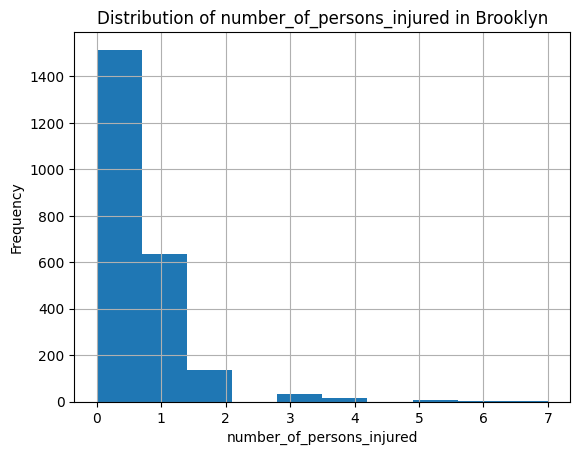

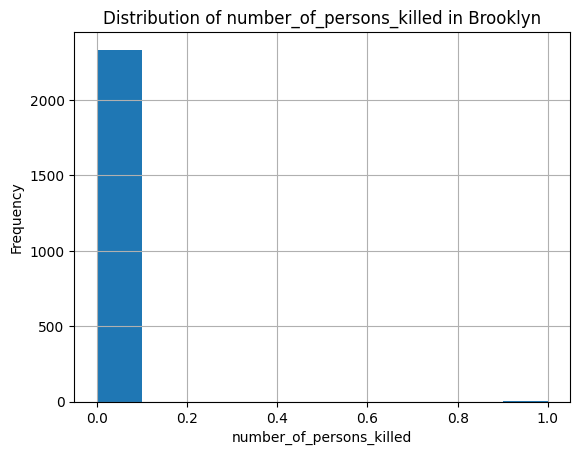

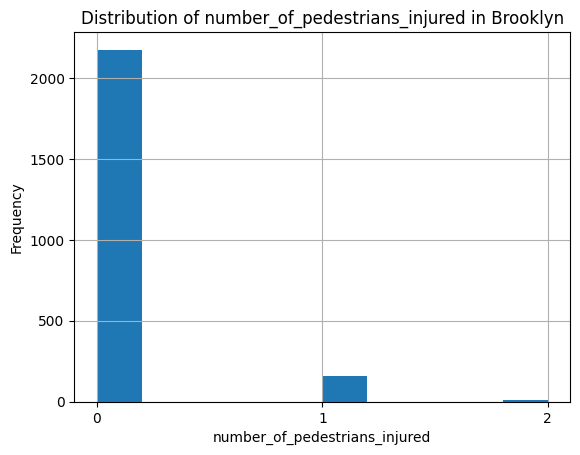

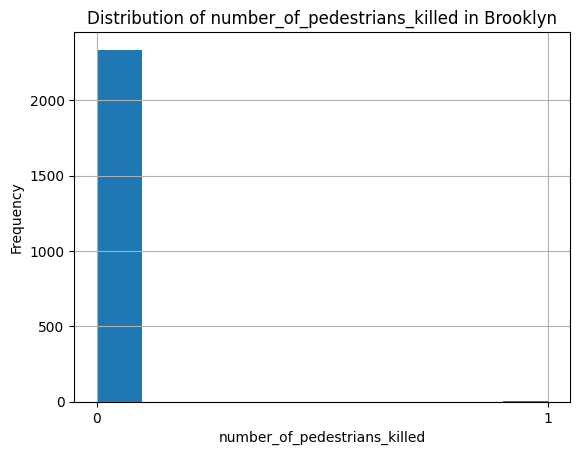

In [11]:
import matplotlib.pyplot as plt

cols_to_hist = ['number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed']

# Create a histogram for each specified column
for col in cols_to_hist:
    plt.figure()  # Create a new figure for each histogram
    borough_df[col].hist()
    plt.title(f'Distribution of {col} in Brooklyn')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

,0
contributing_factor_vehicle_1,17
contributing_factor_vehicle_2,533
contributing_factor_vehicle_3,2080
contributing_factor_vehicle_4,2258
contributing_factor_vehicle_5,2311


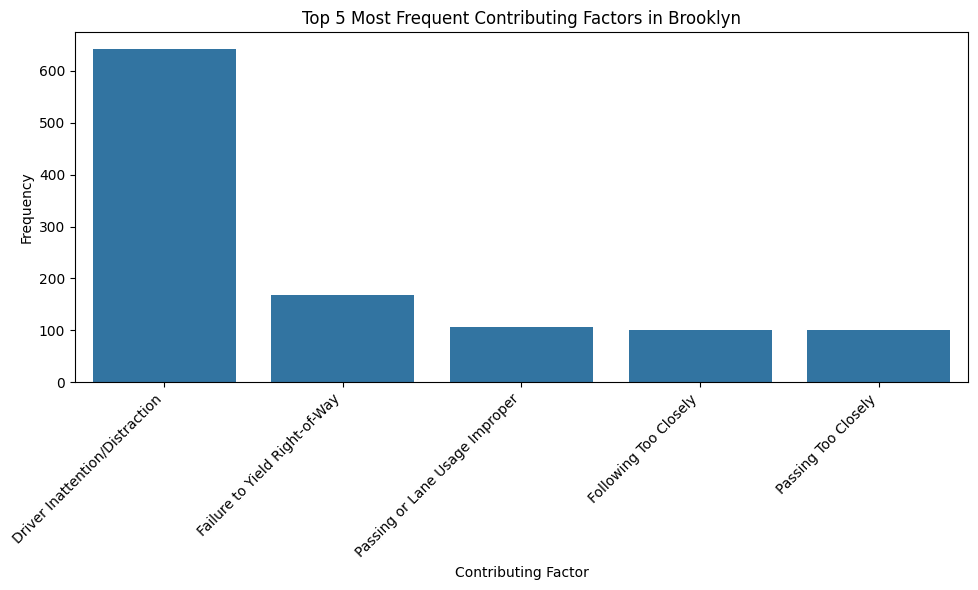

In [25]:
# Calculate the sum of NA values for the specified columns
na_counts_contrib_fact = borough_df[['contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5']].isnull().sum()

# Display the results
display(na_counts_contrib_fact)

import matplotlib.pyplot as plt
import seaborn as sns

# Combine all contributing factor columns into a single Series
all_factors = pd.concat([borough_df[col] for col in ['contributing_factor_vehicle_1', 'contributing_factor_vehicle_2', 'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5']])

# Remove 'Unspecified' and NaN values
filtered_factors = all_factors[(all_factors != 'Unspecified') & all_factors.notna()]

# Get the top 5 most frequent factors
top_5_factors = filtered_factors.value_counts().nlargest(5)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_factors.index, y=top_5_factors.values)
plt.title('Top 5 Most Frequent Contributing Factors in Brooklyn')
plt.xlabel('Contributing Factor')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [14]:
# Combine all vehicle type columns into a single Series
all_vehicle_types = pd.concat([borough_df[col] for col in ['vehicle_type_code1', 'vehicle_type_code2', 'vehicle_type_code_3', 'vehicle_type_code_4', 'vehicle_type_code_5']])

# Remove NaN values
filtered_vehicle_types = all_vehicle_types.dropna()

# Get the most frequent vehicle types
top_vehicle_types = filtered_vehicle_types.value_counts().nlargest(10)

print("Top 10 most frequent vehicle types involved in crashes:")
display(top_vehicle_types)

Top 10 most frequent vehicle types involved in crashes:


,count
Sedan,2010
Station Wagon/Sport Utility Vehicle,1421
Bike,140
Box Truck,86
Bus,84
Pick-up Truck,76
E-Bike,55
Taxi,50
Van,34
Motorcycle,26


In [15]:
earliest_date = borough_df['crash_date'].min()
latest_date = borough_df['crash_date'].max()

print(f"Earliest crash date: {earliest_date}")
print(f"Latest crash date: {latest_date}")

Earliest crash date: 2016-04-16 00:00:00
Latest crash date: 2023-12-15 00:00:00
